In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Datasets:
highest_daily_rainfall = pd.read_csv('data/rainfall-monthly-highest-daily-total.csv')
no_of_rain_monthly = pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv')
total_monthly_rainfall = pd.read_csv('data/rainfall-monthly-total.csv')
mean_relative_humidity = pd.read_csv('data/relative-humidity-monthly-mean.csv')
sunshine_duration = pd.read_csv('data/sunshine-duration-monthly-mean-daily-duration.csv')
surface_air_temp = pd.read_csv('data/surface-air-temperature-monthly-mean.csv')
#wet_bulb_temp = pd.read_csv('data/wet-bulb-temperature-hourly.csv')
profile = pd.read_excel('data/tourism-industry-profile-monthly.xlsx', sheet_name = 'T1')

In [3]:
#This project will only focus on 10 years trends starting from pre-COVID19 period [Jan 2009 to Dec 2019]
profile_10 = profile.loc[:, '2019 Dec':'2009 Jan']
profile_10 = pd.concat([profile.iloc[:,0], profile_10], axis=1)
#To look at general trends by regions (a group of countries)
profile_by_region = profile_10.iloc[[1, 10, 15, 25, 32, 36, 52, 56], :]
profile_by_region = profile_by_region.rename({'Data Series':'Index'}, axis = 1)
profile_by_region = profile_by_region.T 
profile_by_region.columns = profile_by_region.iloc[0]
profile_by_region = profile_by_region[1:]
profile_by_region = profile_by_region.reset_index()
profile_by_region = profile_by_region.rename({'index':'month'}, axis = 1)
profile_by_region.columns = profile_by_region.columns.str.strip()

In [4]:
def convert_date(the_df, month_col):
    monthdict = {'-01':' Jan', '-02':' Feb', '-03':' Mar', '-04':' Apr', '-05':' May', '-06':' Jun', '-07':' Jul','-08':' Aug', '-09':' Sep', '-10':' Oct', '-11':' Nov', '-12':' Dec'}
    the_df[month_col] = the_df.replace({month_col:monthdict}, regex=True)[month_col]
    return the_df

In [5]:
datasets = [highest_daily_rainfall, no_of_rain_monthly, total_monthly_rainfall, mean_relative_humidity, sunshine_duration]

In [6]:
for dataset in datasets:
    dataset = convert_date(dataset, 'month')
    profile_by_region = profile_by_region.merge(dataset, on = 'month')
profile_by_region

,month,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs
0,2019 Dec,662907,342199,118932,14757,100218,189183,134070,16335,74.2,14,421.5,83.9,4.8
1,2019 Nov,565680,319671,125534,12438,82972,179959,100883,7472,73.4,15,137.4,79.2,5.5
2,2019 Oct,555996,331072,136707,12276,68654,164050,112052,6697,92.2,15,176.8,78.1,6.5
3,2019 Sep,511664,318888,132515,11778,64342,159864,127327,7961,16.4,4,22.8,73.0,6.7
4,2019 Aug,520958,499809,173762,22847,71328,203813,99796,8289,3.8,6,11.8,72.1,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2009 May,286750,86145,51730,7251,33982,82992,68000,5007,41.3,17,198.6,83.0,6.6
128,2009 Apr,292558,128044,53014,7817,36347,108721,72719,6044,86.6,12,183.7,82.2,6.2
129,2009 Mar,283896,125937,67628,14730,41421,130029,60594,5570,56.3,19,223.3,85.4,5.5
130,2009 Feb,231174,113312,70257,7176,35014,116089,56345,4438,74.2,8,201.8,80.7,6.4


In [32]:
profile_by_region['year'] = profile_by_region['month'].str[:5].astype('int64')

In [18]:
profile_by_region.iloc[:,1:9] = profile_by_region.iloc[:,1:9].astype('int64')

In [38]:
profile_by_region[profile_by_region['year']==2019].corr()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
Southeast Asia,1.000000,-0.139434,-0.392682,0.367384,0.453332,-0.429814,0.419117,0.661383,0.395436,0.624235,0.689337,0.695354,-0.733150,NaN
Greater China,-0.139434,1.000000,0.540119,0.704669,0.084806,0.399865,-0.044775,-0.113068,-0.624362,-0.511857,-0.479954,-0.497044,0.542941,NaN
North Asia,-0.392682,0.540119,1.000000,0.519148,-0.093999,0.615857,-0.055533,0.028447,-0.254323,-0.497390,-0.416651,-0.626923,0.463743,NaN
West Asia,0.367384,0.704669,0.519148,1.000000,0.190042,0.181519,0.151663,0.289457,-0.289105,-0.206114,-0.109456,-0.280611,0.026844,NaN
Americas,0.453332,0.084806,-0.093999,0.190042,1.000000,0.411691,0.260084,0.519092,0.199931,0.164994,0.452630,0.320681,-0.170852,NaN
Europe,-0.429814,0.399865,0.615857,0.181519,0.411691,1.000000,-0.001332,0.121535,-0.044369,-0.553127,-0.127638,-0.436240,0.470155,NaN
Oceania,0.419117,-0.044775,-0.055533,0.151663,0.260084,-0.001332,1.000000,0.574512,0.263006,0.125876,0.339381,0.309177,-0.549582,NaN
Africa,0.661383,-0.113068,0.028447,0.289457,0.519092,0.121535,0.574512,1.000000,0.388372,0.241659,0.767071,0.539296,-0.604453,NaN
maximum_rainfall_in_a_day,0.395436,-0.624362,-0.254323,-0.289105,0.199931,-0.044369,0.263006,0.388372,1.000000,0.711016,0.752840,0.673158,-0.654701,NaN
no_of_rainy_days,0.624235,-0.511857,-0.497390,-0.206114,0.164994,-0.553127,0.125876,0.241659,0.711016,1.000000,0.646918,0.859319,-0.742535,NaN


In [43]:
year2019 = profile_by_region[profile_by_region['year']==2019]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

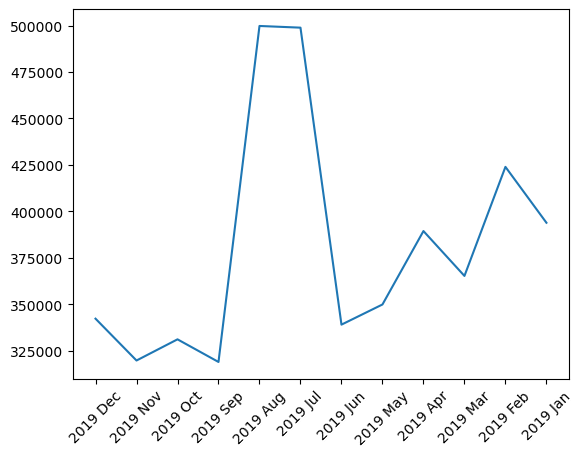

In [49]:
plt.plot(year2019['month'], year2019['Greater China'])
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

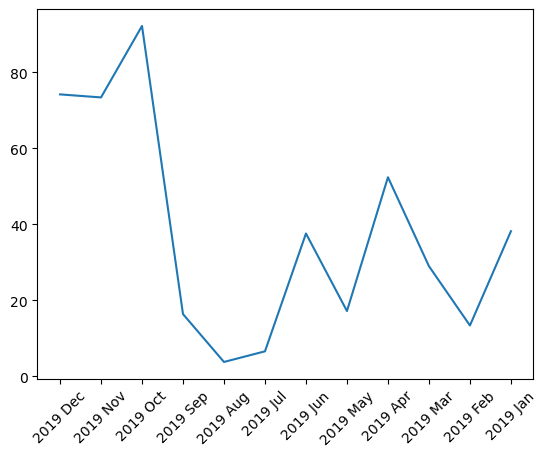

In [50]:
plt.plot(year2019['month'], year2019['maximum_rainfall_in_a_day'])
plt.xticks(rotation = 45)